In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data ={'eng':[10,30,50,70],
      'kor':[20,40,60,80],
      'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'])
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [ ]:
# CRUD 추가, 수정, 삭제, 검색, 정렬

In [2]:
# 컬럼이 있으면 수정 없으면 추가
df['my'] = [1,2,3,4]
df

,eng,kor,math,my
a,10,20,90,1
b,30,40,50,2
c,50,60,20,3
d,70,80,70,4


In [4]:
df['my1'] = df['eng']
df

,eng,kor,math,my,my1
a,10,20,90,1,10
b,30,40,50,2,30
c,50,60,20,3,50
d,70,80,70,4,70


In [5]:
df['my2'] = df['eng'] + df['kor']
df

,eng,kor,math,my,my1,my2
a,10,20,90,1,10,30
b,30,40,50,2,30,70
c,50,60,20,3,50,110
d,70,80,70,4,70,150


In [ ]:
import pandas as pd
import numpy as np

data ={'eng':[10,30,50,70],
      'kor':[20,40,60,80],
      'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'])
df

In [7]:
# row도 있으면 수정 없으면 추가
df.loc['e'] = [1,2,3]
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
e,1,2,3


In [8]:
# 삭제
# df.drop(인덱스 or 컬럼)
# 실제 데이터에 반영하기 위해서는 아래와 같이 적용 필요.
# df = df.drop(index=['a','d'])
# df.drop(index=['a','d'], inplcae=True)
df.drop(index=['a','d'])

,eng,kor,math
b,30,40,50
c,50,60,20
e,1,2,3


In [10]:
df.drop(columns=['kor','eng'])

,math
a,90
b,50
c,20
d,70
e,3


In [14]:
df.loc['b','kor'] = np.nan
df

,eng,kor,math
a,10,20.0,90
b,30,NaN,50
c,50,60.0,20
d,70,80.0,70


In [16]:
df.loc['b':'c','math'] = np.nan
df

,eng,kor,math
a,10,20.0,90.0
b,30,NaN,NaN
c,50,60.0,NaN
d,70,80.0,70.0


In [ ]:
# 전처리: nan데이터 처리(비어있는데이터를 반드시 처리)
# 1) 삭제
# 2) 평균값 등으로 채운다

In [17]:
# nan이 있는 행 삭제 
# df.dropna(axis=0) :defaut
df.dropna()

,eng,kor,math
a,10,20.0,90.0
d,70,80.0,70.0


In [19]:
# nan 컬럼을 삭제
df.dropna(axis=1) 

,eng
a,10
b,30
c,50
d,70


In [20]:
# 특정 컬럼의 nan이 있는 행 삭제
df.dropna(subset=['kor'])

,eng,kor,math
a,10,20.0,90.0
c,50,60.0,NaN
d,70,80.0,70.0


In [23]:
# 컬럼별 nan 갯수 구하기
df.isnull().sum()

eng     0
kor     1
math    2
dtype: int64

In [25]:
# nan이 있는 컬럼별 상태를 그래픽하게 볼때 사용하는 라이브러리
!pip install missingno

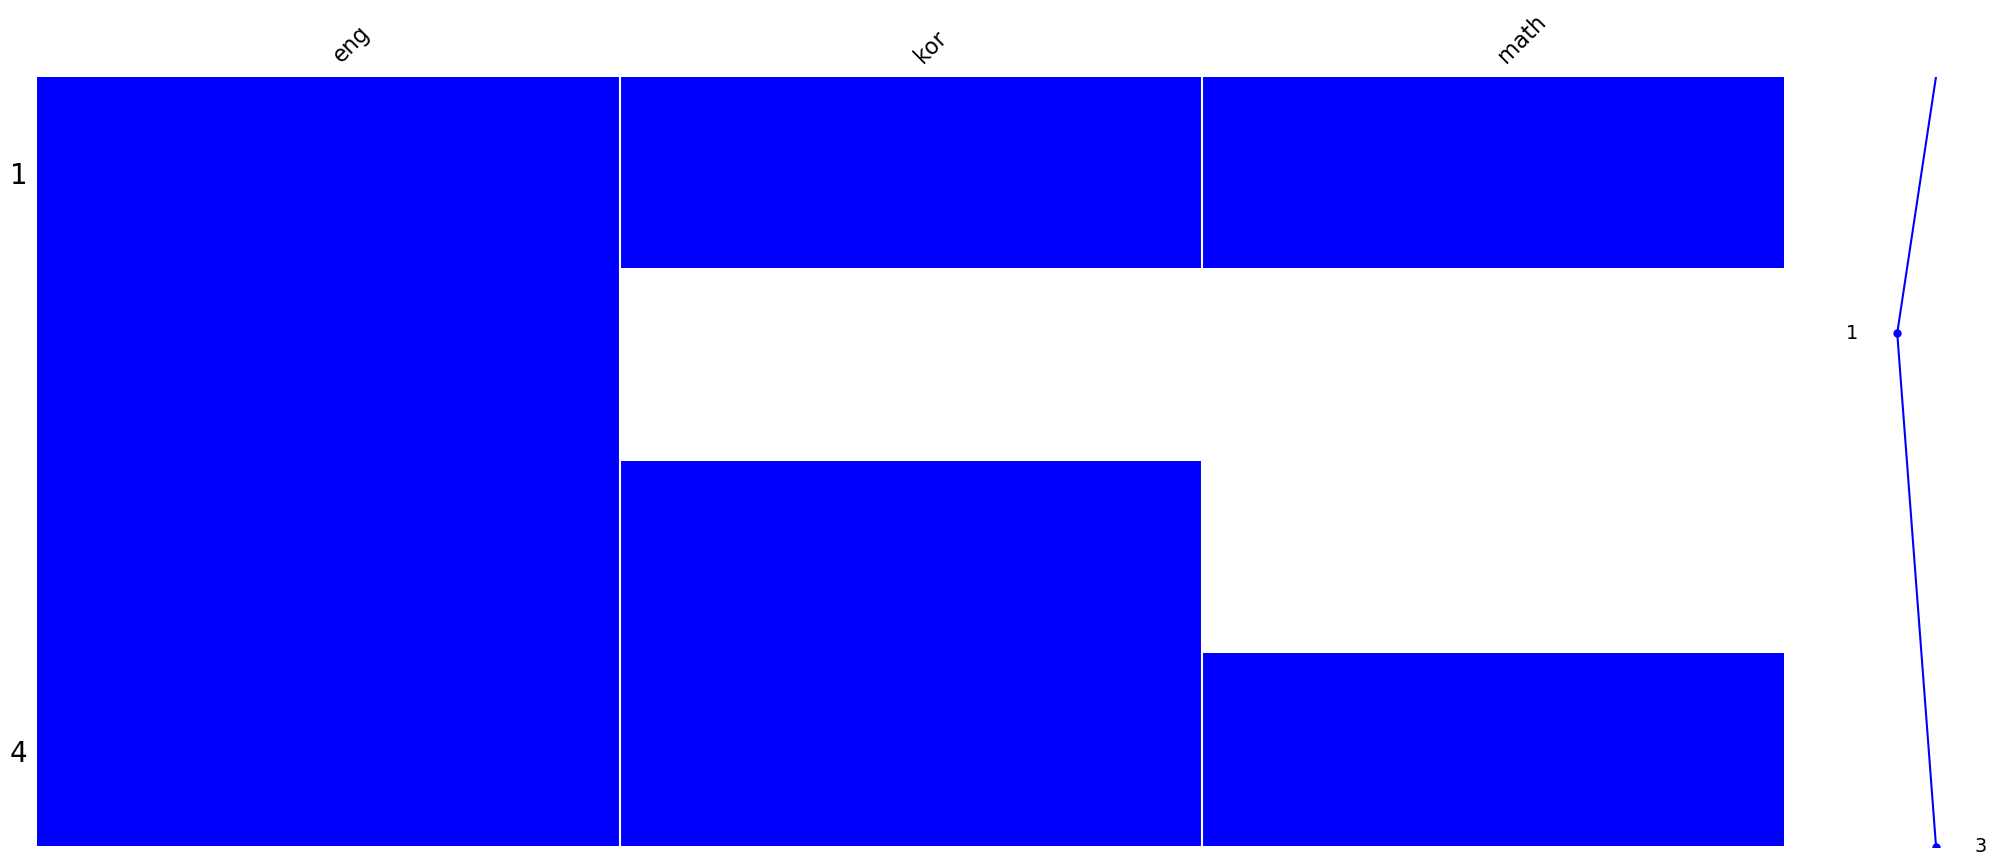

In [31]:
import missingno as m
m.matrix(df, color=(0, 0, 1))
plt.show()

In [32]:
df.fillna(10)

,eng,kor,math
a,10,20.0,90.0
b,30,10.0,10.0
c,50,60.0,10.0
d,70,80.0,70.0


In [33]:
df['kor'].fillna(10)

a    20.0
b    10.0
c    60.0
d    80.0
Name: kor, dtype: float64

In [34]:
df['kor'] = df['kor'].fillna(10)
df


,eng,kor,math
a,10,20.0,90.0
b,30,10.0,NaN
c,50,60.0,NaN
d,70,80.0,70.0


In [ ]:
data ={'eng':[10,30,50,70],
      'kor':[20,40,60,80],
      'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'])
df

In [36]:
# 어떤 컬럼으로 정렬할지 기준 컬럼을 정해줘야 한다.
df.sort_values(by='math')

,eng,kor,math
c,50,60,20
b,30,40,50
d,70,80,70
a,10,20,90


In [37]:
# 내림차순
df.sort_values(by='math', ascending = False)

,eng,kor,math
a,10,20,90
d,70,80,70
b,30,40,50
c,50,60,20


In [38]:
df.loc['c','kor'] = 40
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,40,20
d,70,80,70


In [40]:
df.sort_values(by='kor')

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,40,20
d,70,80,70


In [41]:
# 1. kor로 오름차순 정렬하고,
# 2. 동률인 경우에 math로 오름차순 정렬
df.sort_values(by=['kor','math'])

,eng,kor,math
a,10,20,90
c,50,40,20
b,30,40,50
d,70,80,70
